#**Predictive Analysis of Diabetes: Unraveling Patterns and Enhancing Prognostic Accuracy with Machine Learning Models**


**AIM**

The main aim of this study is to compare and find the best model for predicting diabetes. In this project we used the PIMA Indian heritage diabetes dataset, which consists of 768 data records and has 8 unique features and 1 outcome variable.In this study, five machine learning algorithms such as K-Nearest Neighbours, Logistic Regression, Decision Tree, Random Forest and Support Vector Machine is used for predictive analytics.

# **Section 1: Data Analysis**

In This section all the necessary libraries such as Pandas, Numpy and Matplotlib where imported into google colab for the process of data analysis, data pre-processing and data visualizations.


*   pandas - Used to read the dataset

*   numpy  - Used for numerical computations and also to find or replace the missing values with NaN (Not A Number)

*   matplotlib.pyplot - This module provides a powerful toolset for creating a wide range of plots and charts.







In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the CSV file "diabetes.csv" located at the specified path
data = pd.read_csv("/content/diabetes.csv")
# Displaying the contents of the dataframe to inspect the loaded data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking for Missing Values
# .isnull() function is used to find the missing values
# Also .sum() function is used to count the number of missing values in each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# .describe() function is used to produce the summary of the statistics of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Section 2: Data Pre-processing**

Based on the statistics of the data found that except feature "Age", all other features indicates the minimum value of 0. For instance, let's take an feature blood pressure containing zero value for a person is not possible.So in our analysis, we found evidence of missing data for features including Skin Thickness, Insulin, BMI, Glucose, and Blood Pressure. Our approach involved turning entries that were previously registered as 0 into NaN, which allowed us to successfully identify incomplete or incorrectly reported data in the dataset.

In [5]:
data.columns
# Replacing 0 values with NaN in selected columns
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [6]:
# Checking how many missing values in each features
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

A histogram plot distribution was used during the data imputation procedure to evaluate the attributes' characteristics. This plot revealed that Skin Thickness, Insulin, and BMI followed a Positively Skewed distribution, whereas Glucose and Blood Pressure exhibited a normal distribution. For features with positively skewed distributions, we chose to impute missing values using the Median, while for features with normal distributions, we chose to use the Mean.

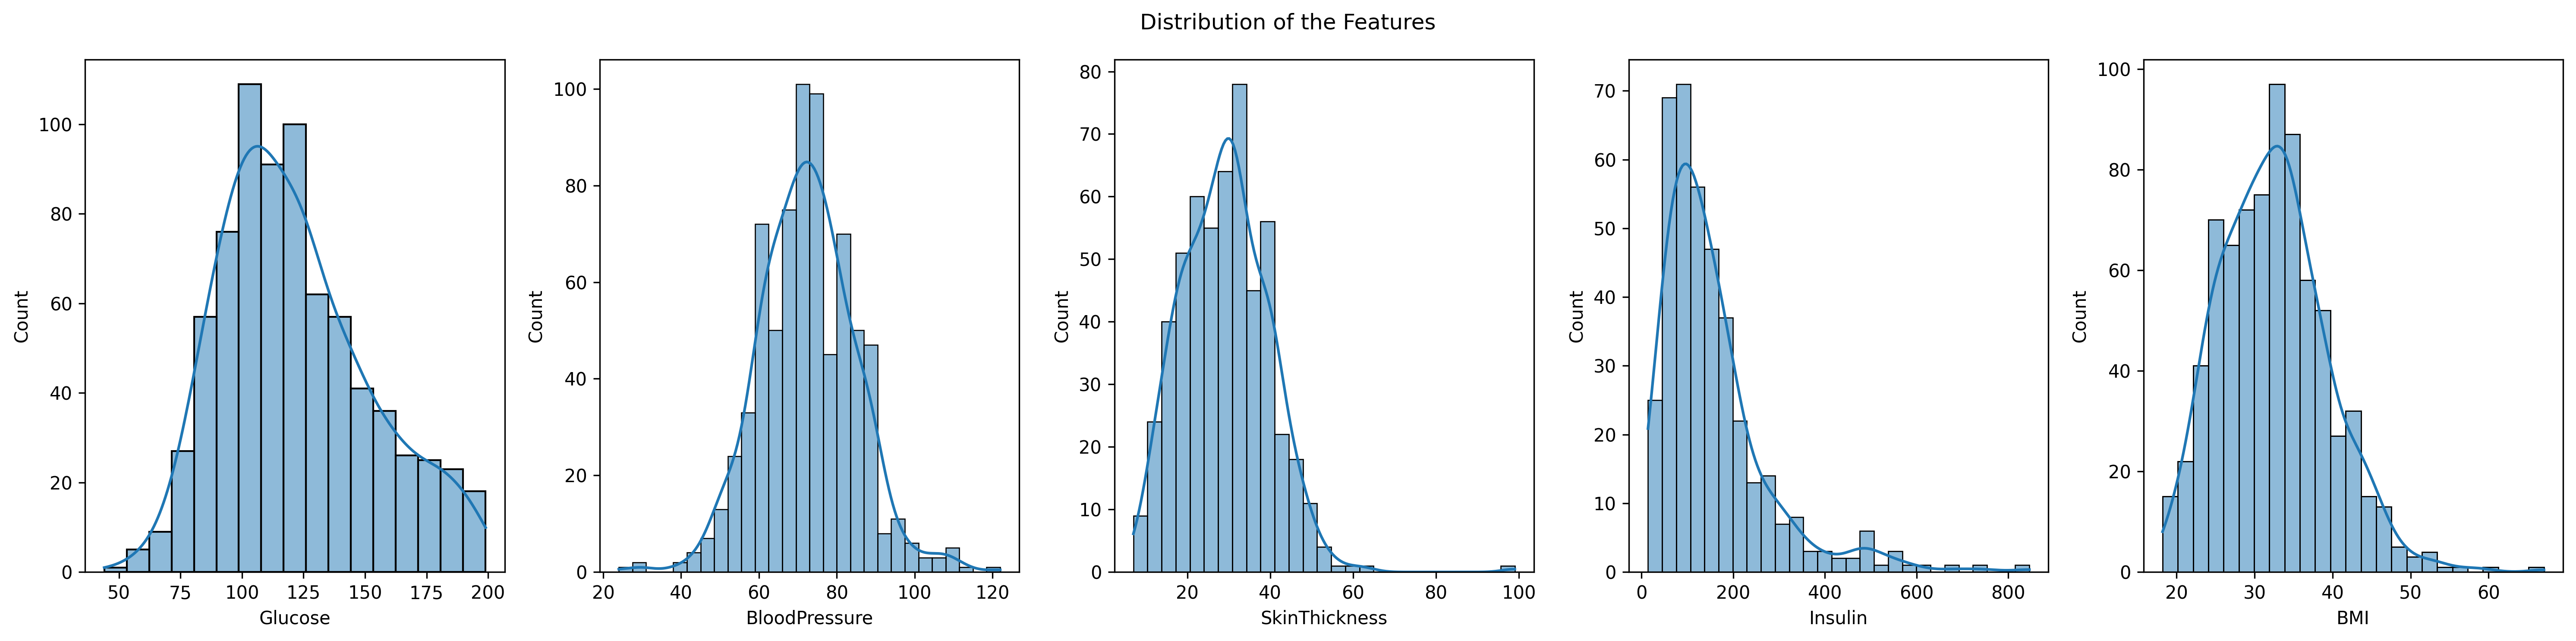

In [7]:
# Importing the Seaborn library for visualization
import seaborn as sns
# List of columns with missing values (NaN)
columns_with_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Creating subplots for each column's distribution
# 'fig' is the figure object and 'ax' is an array of Axes objects
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5),  dpi=300)

# Looping through each column and creating a histogram with KDE
for i, column in enumerate(columns_with_nan):
    sns.histplot(data=data, x=column, kde=True, ax=ax[i])

# Giving main title to the entire set of  plots
plt.suptitle("Distribution of the Features")
# Adjusting layout for better spacing
plt.tight_layout()
# Displaying the plots
plt.show()

In [8]:
#.loc[] function is used to access column which is found to have missing values
# By replacing it with .mean() and .median()
Glucose_mean = data.loc[:,"Glucose"].mean()
BloodPressure_mean = data.loc[:,"BloodPressure"].mean()
SkinThickness_median = data.loc[:,"SkinThickness"].median()
Insulin_median = data.loc[:,"Insulin"].median()
BMI_median = data.loc[:,"BMI"].median()

In [9]:
# .fillna() function is used to fill the NaN with calculated mean and median
data.loc[:,"Glucose"] = data.loc[:,"Glucose"].fillna(Glucose_mean)
data.loc[:,"BloodPressure"] = data.loc[:,"BloodPressure"].fillna(BloodPressure_mean)
data.loc[:,"SkinThickness"] = data.loc[:,"SkinThickness"].fillna(SkinThickness_median)
data.loc[:,"Insulin"] = data.loc[:,"Insulin"].fillna(Insulin_median)
data.loc[:,"BMI"] = data.loc[:,"BMI"].fillna(BMI_median)

In [10]:
# Checking for Missing Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Renaming the column in the DataFrame
data.rename(columns={"DiabetesPedigreeFunction": "DPF"}, inplace=True)

In [12]:
# Selecting specific columns from the dataset to form the feature set 'x' and the target variable 'y'
x = data[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age']]
y = data['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0              6    148.0           72.0           35.0    125.0  33.6  0.627   
1              1     85.0           66.0           29.0    125.0  26.6  0.351   
2              8    183.0           64.0           29.0    125.0  23.3  0.672   
3              1     89.0           66.0           23.0     94.0  28.1  0.167   
4              0    137.0           40.0           35.0    168.0  43.1  2.288   
..           ...      ...            ...            ...      ...   ...    ...   
763           10    101.0           76.0           48.0    180.0  32.9  0.171   
764            2    122.0           70.0           27.0    125.0  36.8  0.340   
765            5    121.0           72.0           23.0    112.0  26.2  0.245   
766            1    126.0           60.0           29.0    125.0  30.1  0.349   
767            1     93.0           70.0           31.0    125.0  30.4  0.315   

     Age  
0     50  
1    

# **Section 3: Data Splitting and Data Normalization**

In Scikit-Learn from the model_selection module, we have imported train_test_split and from the preprocessing module we have imported MinMax Scaler

*   MinMax Scaler    - This Feature scaling is important to ensure that features are on the same scale, which can improve the performance of certain machine learning algorithms. This scaling is used to scale all our selected features to a range between 0 to 1.

*   train_test_split - This function is used to split the dataset into train and test data. In training set, which constitutes 80% of the dataset, was dedicated to training the machine learning model, enabling it to learn patterns and relationships from the data. Subsequently, the testing set, comprising the remaining 20% of the dataset, was employed to evaluate the model performance.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating an instance of MinMaxScaler to perform feature scaling
scaler = MinMaxScaler()
# Fit and transforming the training feature using the scaler
X_train = scaler.fit_transform(X_train)
# Transforming the testing feature using the same scaler
X_test= scaler.transform(X_test)

#**Section 4 : Implementation of Machine Learning algorithm**

*   In this section we will be implementing KNN, LR, DT, RF and SVM model to our dataset by importing the necessary class from "sklearn"

*   Fit the model to the training data (X_train and y_train). This involves learning the relationships between the features and the target outcomes in the training data.

*   Then used the trained model to predict the outcomes for the testing data (X_test) using the .predict() method. The predicted outcomes are stored in the variable.

*   To evaluated the performance of the model we used metrics such as accuracy, confusion matrix and ROC curve.

*   To calculate the accuracy of the model we import "accuracy_score" function from "sklearn.metrics"

*   Calculated the accuracy of the KNN model's predictions by comparing the predicted outcomes with the actual outcomes (y_test) and then the accuracy is rounded.


*   Calculated the confusion matrix for the KNN model's predictions by passing the actual outcomes (y_test) and the predicted outcomes to the confusion_matrix() function. The resulting matrix provides information about the model's performance in terms:

  1.   True Positive (TP)	When the model correctly predicts the positive class where the actual class is indeed positive

  2.   True Negative (TN)	When the model correctly predicts the negative class where the actual class is indeed negative

  3.   False Positive (FP)	When the model predicts the positive class, but the actual class is negative.
  4.   False Negative (FN)	When the model predicts the negative class, but the actual class is positive.

#**Section 4.1: K-Nearest Neighbors**

The accuracy achieved in the early phases of using the K-Nearest Neighbours (KNN) algorithm was around 73%. It's significant that using "Uniform" weight allowed to reach its highest accuracy of 81%. This extensive research into the KNN algorithm's optimisation highlights its versatility and the crucial role that parameter selection plays. The model's accuracy was significantly improved, as a result of the method of experimenting with various parameters and thorough evaluation.

An in-depth study was conducted in an effort to optimise the model, including training it with two different weight assignments: "Uniform" and "Distance." The goal of this methodical investigation was to determine the K value that best matched both weight types. This particular technique impressively resulted in the finding of the ideal K values, which were 89 for "Uniform" weight and 90 for "Distance" weight.
Also detailed exploration was carried out in our KNN model by removing individual features one by one and found the accuracy of prediction. This comprehensive evaluation indicates how each feature affects the model's ability to provide accurate predictions. The forecasts' accuracy fell by 21% when features including pregnancies, skin thickness, and diabetes pedigree function were removed. Similarly, removing features like age, blood pressure, insulin and BMI reduced accuracy by more than 19%. The results showed that when the Glucose feature was removed, the accuracy drastically decreased by 32%, indicating that this feature plays a major role in KNN prediction.

The model is evaluated by conufusion matrix, where the

1.   True Negative (TN) - 76
2.   False Positive(FP) - 23
3.   False Negative(FN) - 19
4.   True Positive (TP) - 36



Then model is also evaluated by AUC-ROC and found score of about **0.81** with respect to true positive rate and False Positive Rate.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Creating an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier()
# Training the KNN model using the training data
knn_model.fit(X_train,y_train)
# Predicting on the testing data using the trained model
y_predited_value = knn_model.predict(X_test)
from sklearn.metrics import accuracy_score
# Calculating accuracy of the model
accuracy_knn = (accuracy_score(y_test,y_predited_value)*100).round(0)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 73.0


Confusion Matrix of KNN:
 [[76 23]
 [19 36]]


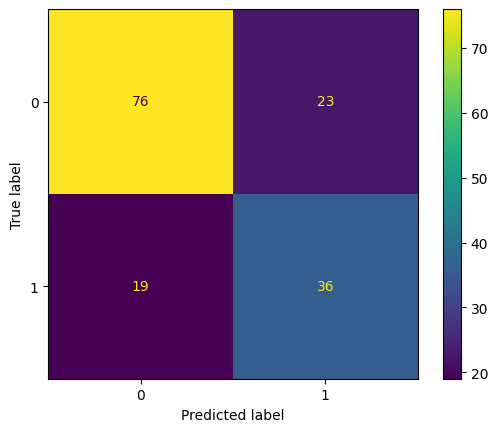

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate and print the confusion matrix for the KNN model's predictions
print("Confusion Matrix of KNN:\n", confusion_matrix(y_test, y_predited_value))
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predited_value)

Finding best K Value

In [16]:
# Initialized empty lists to store 'k' values and corresponding accuracies
k_values = []
accuracies = []

# Iterating through a range of 'k' values from 1 to 153
for k in range(1, 154):
  # In the iteration, created a KNN model with the 'k' value and using uniform weighting
  knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
  # Fit the model to the training data
  knn.fit(X_train,y_train)
  # Predicted the outcomes on the testing data using the trained model
  y_preded = knn.predict(X_test)
  # Calculate the accuracy of the model with current k value
  accuracy = accuracy_score(y_test, y_preded)
  # Append the current 'k' value and accuracy to the empty lists created
  k_values.append(k)
  accuracies.append(accuracy)

# Finding the index of the highest accuracy in the accuracies list
best_index = accuracies.index(max(accuracies))
# Grtting the 'k' value and accuracy corresponding to the best performance
best_k = k_values[best_index]
best_accuracy = accuracies[best_index]
print("Best k:", best_k)
print("Best accuracy:", (best_accuracy*100).round(0))

Best k: 90
Best accuracy: 81.0


In [17]:
# Storing column names in a list
column_names_stored = x.columns.tolist()

# Initializing an empty dictionary to store results
results = {}

# Looping through each column for feature elimination
for i, column in enumerate(column_names_stored):
    # Removing the current column from both training and testing data
    X_train_filtered = np.delete(X_train, i, axis=1)
    X_test_filtered = np.delete(X_test, i, axis=1)

    # Setting a range of 'k' values to test
    k_values = range(1, 154)

    # Initializing variables to track the best 'k' and accuracy
    best_k = 0
    best_accuracy = 0.0

    # Looping through 'k' values to find the best 'k' when each column are dropped
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        knn.fit(X_train_filtered, y_train)
        accuracy = knn.score(X_test_filtered, y_test)

        # Updating best 'k' and accuracy if the current accuracy is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    # Storing the results for the current dropped feature in the dictionary
    results[column] = {'Best K': best_k, 'Accuracy': (best_accuracy*100).round(0)}

# Displaying the results for each dropped feature
for column, result in results.items():
    print(f"Dropped Column: {column}")
    print(f"Best K: {result['Best K']}")
    print(f"Accuracy: {result['Accuracy']}")
    print()

Dropped Column: Pregnancies
Best K: 96
Accuracy: 79.0

Dropped Column: Glucose
Best K: 28
Accuracy: 68.0

Dropped Column: BloodPressure
Best K: 64
Accuracy: 81.0

Dropped Column: SkinThickness
Best K: 91
Accuracy: 79.0

Dropped Column: Insulin
Best K: 143
Accuracy: 80.0

Dropped Column: BMI
Best K: 84
Accuracy: 80.0

Dropped Column: DPF
Best K: 14
Accuracy: 79.0

Dropped Column: Age
Best K: 133
Accuracy: 82.0



Visualizing the accuracy after each column dropped

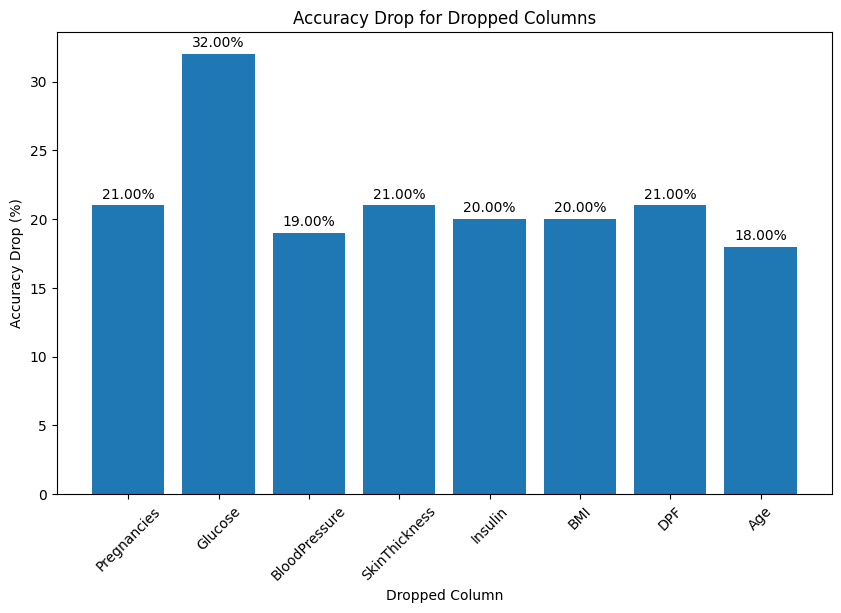

In [18]:
# Create an empty list to store accuracy drops
accuracy_drops = []

# Calculating accuracy drops for each dropped feature
for column, result in results.items():
    accuracy_drop = (100 - result['Accuracy'])
    # Add the calculated accuracy drop for each dropped column to the accuracy_drops list
    accuracy_drops.append(accuracy_drop)

# Bar Plotting the accuracy drops
plt.figure(figsize=(10, 6))
plt.bar(column_names_stored, accuracy_drops)
plt.xlabel('Dropped Column')
plt.ylabel('Accuracy Drop (%)')
plt.title('Accuracy Drop for Dropped Columns')
plt.xticks(rotation=45)

# Add percentage values above each bar
for i, v in enumerate(accuracy_drops):
    plt.text(i, 0.5+v, f"{v:.2f}%", ha='center')

plt.show()

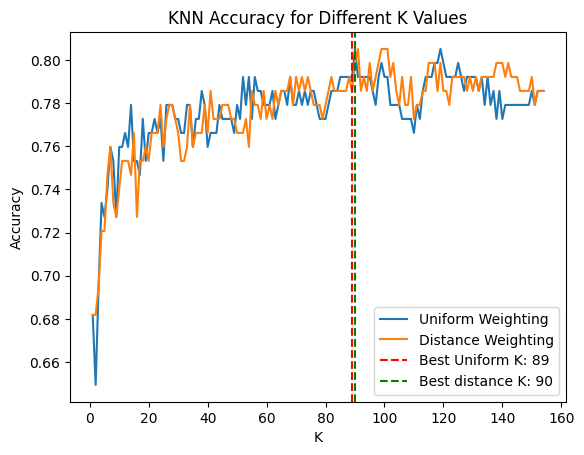

Best K value for uniform weighting: 89
Best K value for distance weighting: 90


In [19]:
k_values = range(1, 155)
# Lists to store accuracy values for uniform and distance weighting
uniform_accuracies = []
distance_accuracies = []

# Looping through different 'k' values
for k in k_values:
    # Creating seperate KNN models with weight as uniform and distance
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    uniform_accuracy = knn_uniform.score(X_test, y_test)
    uniform_accuracies.append(uniform_accuracy)

    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    distance_accuracy = knn_distance.score(X_test, y_test)
    distance_accuracies.append(distance_accuracy)

# Finding the best K value for weight as uniform and distance
best_uniform_k = np.argmax(uniform_accuracies)
best_distance_k = np.argmax(distance_accuracies)

# Plot the accuracy values for both uniform and distance
plt.plot(k_values, uniform_accuracies, label='Uniform Weighting')
plt.plot(k_values, distance_accuracies, label='Distance Weighting')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.axvline(x=best_uniform_k, color='r', linestyle='--', label=f'Best Uniform K: {best_uniform_k}')
plt.axvline(x=best_distance_k, color='g', linestyle='--', label= f'Best distance K: {best_distance_k}')
plt.legend()
plt.show()

print("Best K value for uniform weighting:", best_uniform_k)
print("Best K value for distance weighting:", best_distance_k)

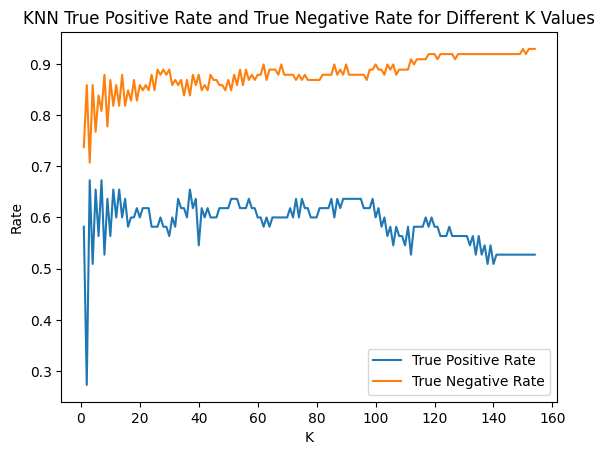

K value with the highest True Positive Rate (TPR): 3
TPR percentage: 67.27272727272727
K value with the highest True Negative Rate (TNR): 150
TNR percentage: 92.92929292929293


In [20]:
tpr_values = []
tnr_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    tpr_values.append(tpr)
    tnr_values.append(tnr)

max_tpr_index = tpr_values.index(max(tpr_values))
max_tnr_index = tnr_values.index(max(tnr_values))

k_with_max_tpr = k_values[max_tpr_index]
k_with_max_tnr = k_values[max_tnr_index]

tpr_percentage = tpr_values[max_tpr_index] * 100
tnr_percentage = tnr_values[max_tnr_index] * 100
plt.plot(k_values, tpr_values, label='True Positive Rate')
plt.plot(k_values, tnr_values, label='True Negative Rate')
plt.xlabel('K')
plt.ylabel('Rate')
plt.title('KNN True Positive Rate and True Negative Rate for Different K Values')
plt.legend()
plt.show()

print("K value with the highest True Positive Rate (TPR):", k_with_max_tpr)
print("TPR percentage:", tpr_percentage)
print("K value with the highest True Negative Rate (TNR):", k_with_max_tnr)
print("TNR percentage:", tnr_percentage)

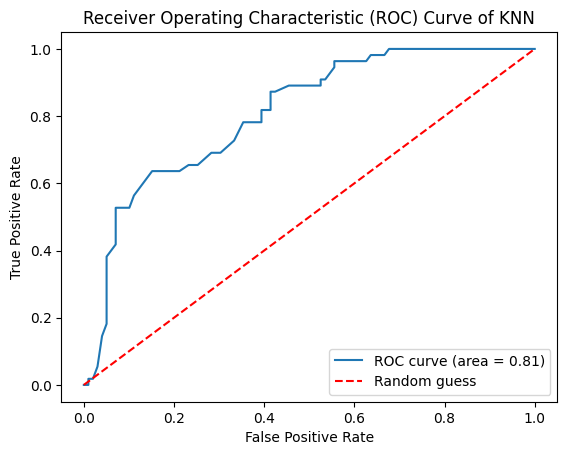

In [21]:
from sklearn.metrics import roc_curve, auc

# Predict the class probabilities using the KNN model
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_knn = auc(fpr_knn, tpr_knn)
# Plot the ROC Curve

plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend(loc='lower right')
plt.show()

#**Section 4.2: Logistic Regression Model**

After implementing logistic regression, we achieved accuracy of 76.62%. By computing the absolute magnitude of the coefficients with the appropriate feature names in a logistic regression model, the important feature may be identified. Among all the features, it is clear that glucose is the most significant. Age and body mass index rank second and third on the importance scale, respectively. These significant features are obviously predictive of whether a patient will develop diabetes and have a major impact on prediction.The model is evaluated by conufusion matrix, where the

1.   True Negative (TN) - 85
2.   False Positive(FP) - 14
3.   False Negative(FN) - 22
4.   True Positive (TP) - 33

The AUC value of 0.82 was shown on the ROC curve of the logistic regression model. In comparison to random guessing, its score shows effective discrimination between positive and negative classes.

In logistic regression model to analyse the data further, we carried out a methodical analysis by removing each feature out one at a time, and analysing how the accuracy changed.The removal of features like pregnancy, blood pressure, and insulin had no impact on accuracy. When features like age, BMI, and diabetes pedigree function were dropped and there were minor accuracy differences of 0.65%. Compared to all the features, Glucose has the highest accuracy variation of about 11.04%.

In [22]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
logreg = LogisticRegression()
# Train the model using training data
logreg.fit(X_train, y_train)
# Predict the labels using the trained model
y_pred_log = logreg.predict(X_test)
# Calculate the accuracy of the Logistic Regression model
accuracy_log = (accuracy_score(y_test, y_pred_log)*100).round(2)
print("Accuracy of Logistic Regression:", accuracy_log)

Accuracy of Logistic Regression: 76.62


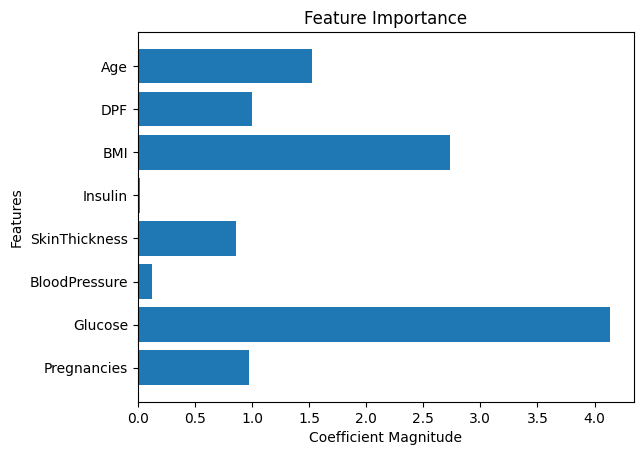

In [23]:
# Retrieving the feature names from the dataset
feature = x.columns
# Retrieving the coefficients from the trained logistic regression model
coefficients = logreg.coef_[0]
# Calculate the absolute coefficients to focus on magnitude regardless of direction
absolute_coefficients_LR = abs(coefficients)
# Created a horizontal bar plot to visualize feature importance
plt.barh(feature, absolute_coefficients_LR)
# Add labels and title to the plot
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance')
# Display the plot
plt.show()

[[85 14]
 [22 33]]


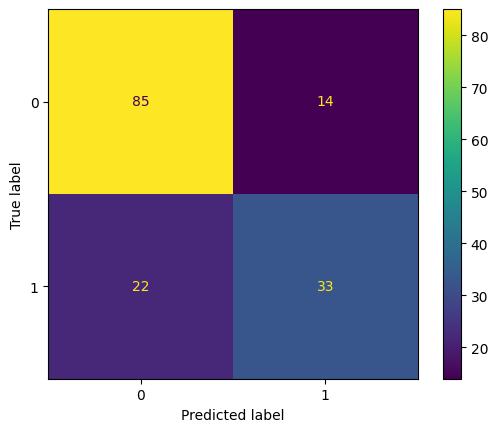

In [24]:
# Print and display the confusion matrix
print(confusion_matrix(y_test, y_pred_log))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

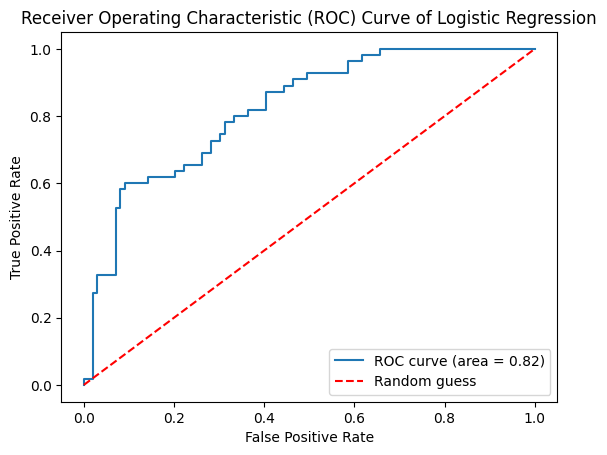

In [25]:
# Predict the class probabilities using the logistic model
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
# Plot the ROC Curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [26]:
# Storing column names in a list for logistic model
column_names_stored_lr = x.columns.tolist()
# Create empty dictionary to store accuracy result
results_lr = {}
# Looping through each column for feature elimination
for i, column in enumerate(column_names_stored_lr):
    # Removing the current column from both training and testing data
    X_train_filtered = np.delete(X_train, i, axis=1)
    X_test_filtered = np.delete(X_test, i, axis=1)

    model = LogisticRegression()
    model.fit(X_train_filtered, y_train)
    y_pred = model.predict(X_test_filtered)
    accuracy = (accuracy_score(y_test, y_pred)*100).round(2)
    # Store the calculated accuracy in the results dictionary
    results_lr[column] = accuracy
# Print accuracy results for each dropped column
for column, accuracy in results_lr.items():
    print(f"Dropped Column: {column}")
    print(f"Accuracy: {accuracy}")
    print()

Dropped Column: Pregnancies
Accuracy: 76.62

Dropped Column: Glucose
Accuracy: 65.58

Dropped Column: BloodPressure
Accuracy: 76.62

Dropped Column: SkinThickness
Accuracy: 77.92

Dropped Column: Insulin
Accuracy: 76.62

Dropped Column: BMI
Accuracy: 75.97

Dropped Column: DPF
Accuracy: 75.97

Dropped Column: Age
Accuracy: 75.97



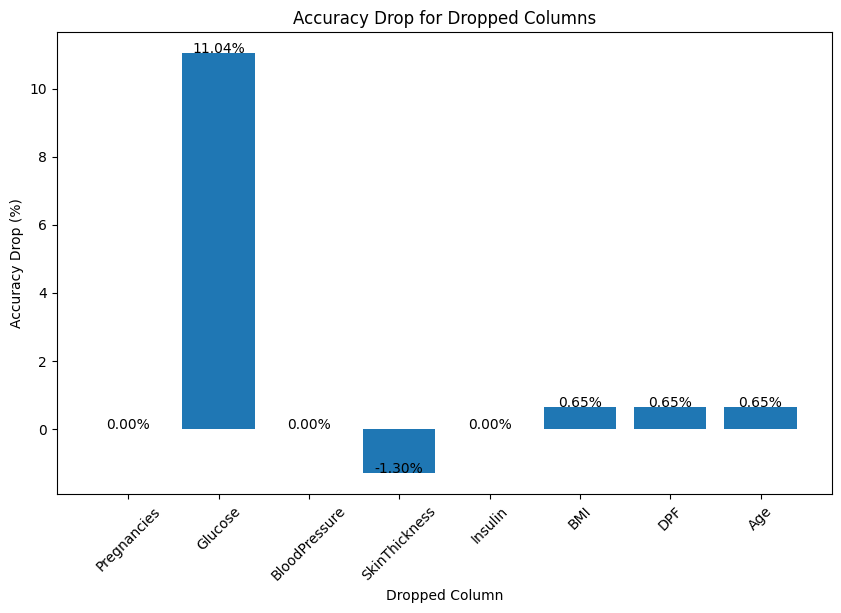

In [27]:
# Create an empty list to store accuracy drops
accuracy_drops_lr = []
# Calculate accuracy drop for each dropped column
for column, accuracy in results_lr.items():
    # Calculate the difference between inital and new accuracy
    accuracy_drop = (accuracy_log - accuracy)
    # Add the calculated accuracy drop for each dropped column to the accuracy_drops_lr list
    accuracy_drops_lr.append(accuracy_drop)
# Create a bar chart to visualize accuracy drops
plt.figure(figsize=(10, 6))
plt.bar(column_names_stored_lr, accuracy_drops_lr)
plt.xlabel('Dropped Column')
plt.ylabel('Accuracy Drop (%)')
plt.title('Accuracy Drop for Dropped Columns')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add percentage values above each bar
for i, v in enumerate(accuracy_drops_lr):
    plt.text(i, v, f"{v:.2f}%", ha='center')

plt.show()

#**Section 4.3: Decision Tree Model**

The decision tree model is applied to our dataset and initially the accuracy achieved is 70% when the default criterion is set to “Gini”. After that, a study was carried out using the "Entropy" criterion and a maximum depth of 3. With these parameter settings, we obtained 77% accuracy. The model is evaluated by conufusion matrix, where the

1.   True Negative (TN) - 76
2.   False Positive(FP) - 23
3.   False Negative(FN) - 23
4.   True Positive (TP) - 32

The performance of the decision tree model is evaluated by ROC AUC, where the model has obtained a score of 0.81 with respect to their True Positive Rate and False Positive Rate.

Following the use of feature elimination methods, an extensive analysis of the accuracy differences provided informative results. However, there was an accuracy difference of about 8% for features like age, pregnancies, BMI, skin thickness, insulin, and diabetes pedigree function. On the other hand, compared to other features glucose and blood pressure showed the biggest differences, with accuracy differences of 19% and 11%, respectively.

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree Classifier model using the Gini criterion
model_dt = DecisionTreeClassifier(criterion= "gini",random_state=50)
# Train the model using training data
model_dt.fit(X_train, y_train)
# Predict the labels using the trained model
y_pred_dt = model_dt.predict(X_test)
# Calculate the accuracy and print
accuracy_dt = (accuracy_score(y_test, y_pred_dt)*100).round(0)
print("Accuracy of the Decision Tree model using gini:", accuracy_dt)

Accuracy of the Decision Tree model using gini: 70.0


Confusion Matrix of Decision Tree using gini:
 [[76 23]
 [23 32]]


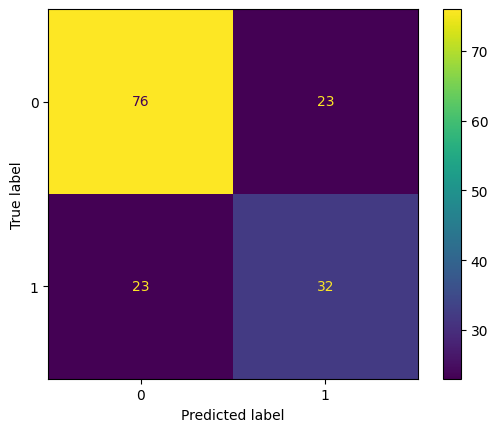

In [29]:
# Print and display the confusion matrix
print("Confusion Matrix of Decision Tree using gini:\n",confusion_matrix(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

In [30]:
# Create decision tree model using entropy
dt_model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=50)
dt_model2 = dt_model2.fit(X_train,y_train)
y_pred = dt_model2.predict(X_test)
# Calculate the accuracy of entropy model
dt_model2_accuracy = (accuracy_score(y_test, y_pred)*100).round(0)
print("Accuracy of the model using  entropy:",dt_model2_accuracy)

Accuracy of the model using  entropy: 77.0


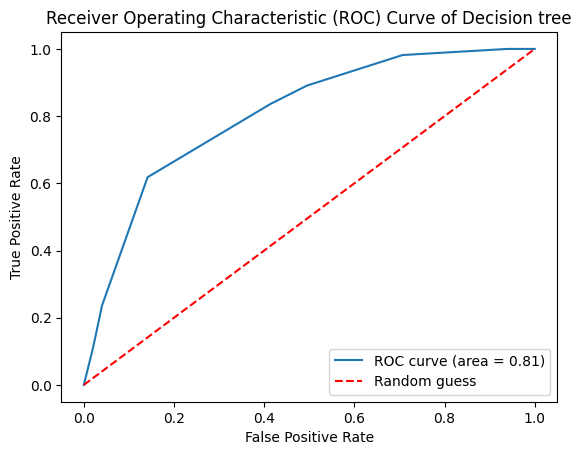

In [31]:
# Predict the class probabilities using the entropy decision tree model
y_pred_proba_dt = dt_model2.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_dt = auc(fpr_dt, tpr_dt)
# Plot the ROC Curve
plt.plot(fpr_dt, tpr_dt, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision tree')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Storing column names in a list for decision tree
column_names_stored_dt = x.columns.tolist()
# Create an empty dictionary to store accuracy results
results_dt = {}

for i, column in enumerate(column_names_stored_dt):
    # Removing the current column from both training and testing data
    X_train_filtered = np.delete(X_train, i, axis=1)
    X_test_filtered = np.delete(X_test, i, axis=1)
    # Create decision tree model
    model = DecisionTreeClassifier(random_state=50)
    model.fit(X_train_filtered, y_train)
    y_pred = model.predict(X_test_filtered)
    accuracy = (accuracy_score(y_test, y_pred)*100).round(0)
    # Store accuracy in the results dictionary
    results_dt[column] = accuracy
# Print accuracy results for each dropped column
for column, accuracy in results_dt.items():
    print(f"Dropped Column: {column}")
    print(f"Accuracy: {accuracy}")
    print()

Dropped Column: Pregnancies
Accuracy: 71.0

Dropped Column: Glucose
Accuracy: 55.0

Dropped Column: BloodPressure
Accuracy: 66.0

Dropped Column: SkinThickness
Accuracy: 73.0

Dropped Column: Insulin
Accuracy: 71.0

Dropped Column: BMI
Accuracy: 71.0

Dropped Column: DPF
Accuracy: 69.0

Dropped Column: Age
Accuracy: 69.0



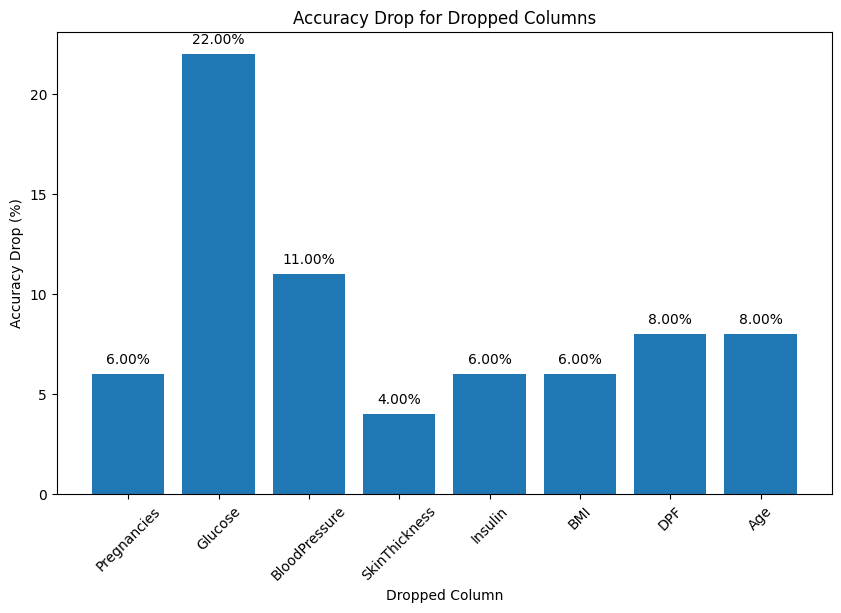

In [33]:
accuracy_drops_dt = []
# Calculate accuracy drop for each dropped column and store in accuracy_drops_dt list
for column, accuracy in results_dt.items():
    accuracy_drop = (dt_model2_accuracy - accuracy)
    # Add the calculated accuracy drop for each dropped column to the accuracy_drops_dt list
    accuracy_drops_dt.append(accuracy_drop)

plt.figure(figsize=(10, 6))
plt.bar(column_names_stored_dt, accuracy_drops_dt)
plt.xlabel('Dropped Column')
plt.ylabel('Accuracy Drop (%)')
plt.title('Accuracy Drop for Dropped Columns')
plt.xticks(rotation=45)
# Add accuracy drop values above each bar
for i, v in enumerate(accuracy_drops_dt):
    plt.text(i, 0.5+v, f"{v:.2f}%", ha='center')

plt.show()

#**Section 4.4: Random Forest Model**

After implementing random forest, the accuracy has been achieved to 75.97%. The model is evaluated by conufusion matrix, where the

1.   True Negative (TN) - 78
2.   False Positive(FP) - 21
3.   False Negative(FN) - 16
4.   True Positive (TP) - 39

The random forest model received a score of 0.84 after being evaluated using the ROC AUC curve. In this model we followed same process by removing each feature one at a time and the results revealed that among all the features, 'glucose' exhibited the most significant accuracy disparity of 5.84%. In contrast, the remaining features displayed accuracy differences below 2.59%.

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier model with a specified random state
model_rf = RandomForestClassifier(random_state=50)
# Train the model using the training data
model_rf.fit(X_train, y_train)
# Predict the labels using the trained model
y_pred_rf = model_rf.predict(X_test)
# Calculate the accuracy of the model
accuracy_rf = (accuracy_score(y_test, y_pred_rf)*100).round(2)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 75.97


[[78 21]
 [16 39]]


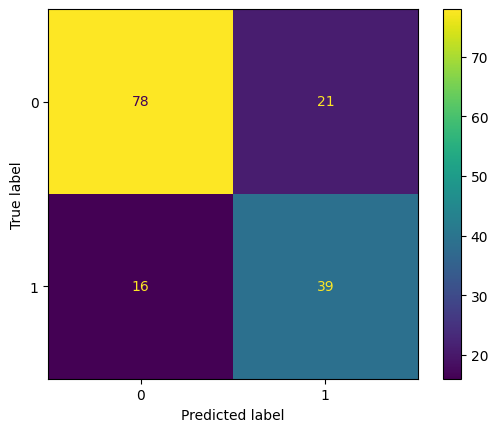

In [35]:
# Print and display the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

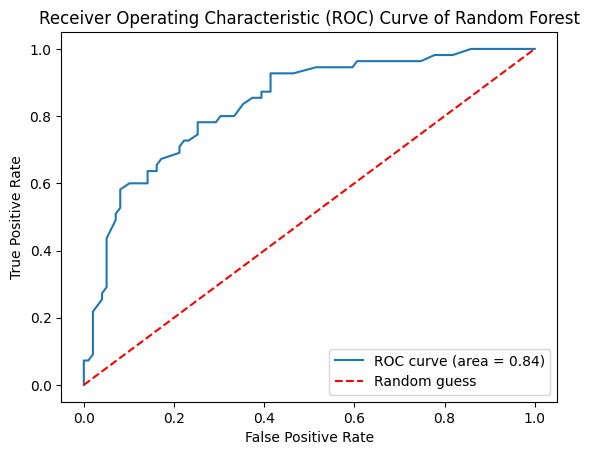

In [36]:
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
# Plot the diagonal line representing random guess
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
# Name the plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Storing column names in a list for random forest
column_names_stored_rf = x.columns.tolist()
# Create a dictionary to store accuracy results
results_rf = {}
# Iterate through each column for feature elimination
for i, column in enumerate(column_names_stored_rf):
    # Removing the current column from both training and testing data
    X_train_filtered = np.delete(X_train, i, axis=1)
    X_test_filtered = np.delete(X_test, i, axis=1)

    # Create random forest model
    model = RandomForestClassifier(random_state=40)
    # Train the model using modified training data
    model.fit(X_train_filtered, y_train)

    # Predict labels for the modified test data
    y_pred = model.predict(X_test_filtered)
    accuracy = accuracy_score(y_test, y_pred)*100
    # Store the calculated accuracy in the results dictionary
    results_rf[column] = accuracy
# Print accuracy results for each dropped column
for column, accuracy in results_rf.items():
    print(f"Dropped Column: {column}")
    print(f"Accuracy: {accuracy:.2f}")
    print()

Dropped Column: Pregnancies
Accuracy: 75.32

Dropped Column: Glucose
Accuracy: 70.13

Dropped Column: BloodPressure
Accuracy: 74.03

Dropped Column: SkinThickness
Accuracy: 75.32

Dropped Column: Insulin
Accuracy: 73.38

Dropped Column: BMI
Accuracy: 74.68

Dropped Column: DPF
Accuracy: 73.38

Dropped Column: Age
Accuracy: 74.03



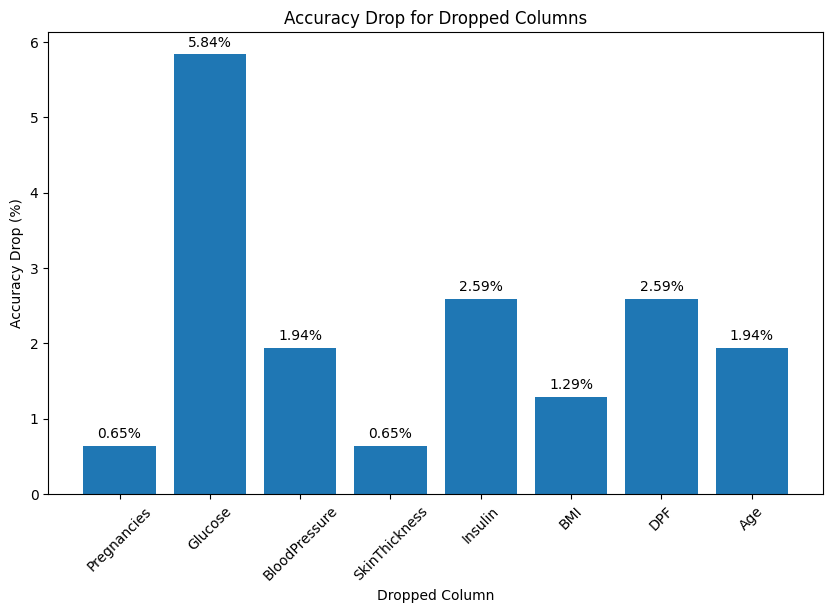

In [38]:
# Create a list to store the accuracy drop
accuracy_drops_rf = []

for column, accuracy in results_rf.items():
    accuracy_drop = (accuracy_rf - accuracy)
    # Add the calculated accuracy drop for each dropped column to the accuracy_drops_rf list
    accuracy_drops_rf.append(accuracy_drop)
# Create a bar chart to visualize accuracy drops
plt.figure(figsize=(10, 6))
plt.bar(column_names_stored_rf, accuracy_drops_rf)
plt.xlabel('Dropped Column')
plt.ylabel('Accuracy Drop (%)')
plt.title('Accuracy Drop for Dropped Columns')
plt.xticks(rotation=45)
# Add accuracy drop values above each bar
for i, v in enumerate(accuracy_drops_rf):
    plt.text(i, 0.10+v, f"{v:.2f}%", ha='center')

plt.show()

#**Section 4.5: Support Vector Machine Model**

In implementation of SVM algorithm to our dataset, two types of kernels were used such as “linear” and “pol”. At first, the 'linear' kernel produced an accuracy of 77.27%.The model is evaluated by conufusion matrix, where the

1.   True Negative (TN) - 85
2.   False Positive(FP) - 14
3.   False Negative(FN) - 21
4.   True Positive (TP) - 34

But when the 'pol' kernel was used, there was only a slight improvement, and the accuracy increased to 78.57%. Interestingly, compared to confusion matrix results produced by the 'linear' kernel, this change only improved overall accuracy but decreased false negatives, which is 20.

A ROC Curve of support vector machine model that was plotted in relation to the False Positive Rate and True Positive Rate, with a score of 0.82. When features like age and skin thickness were dropped one at a time from consideration there was no change in accuracy. While there is a maximum difference of around 4.54% for other features like pregnancies, blood pressure, insulin, BMI, and diabetes pedigree function. The accuracy difference for glucose is the highest of all the features at 8.44%.

In [39]:
from sklearn import svm
# Create an SVM model with a linear kernel
svm_model = svm.SVC(kernel='linear',probability=True,random_state=51)
# Train the model using training data
svm_model.fit(X_train, y_train)
# Predict the labels for the test data using the trained SVM model
y_pred_svm_model = svm_model.predict(X_test)

Accuracy of SVM: 77.27
[[85 14]
 [21 34]]


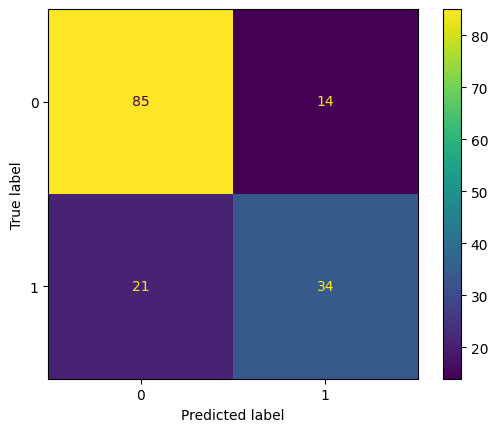

In [40]:
# Calculate and print accuracy of the model
accuracy_svm = (accuracy_score(y_test, y_pred_svm_model)*100).round(2)
print("Accuracy of SVM:", accuracy_svm)
# Print and display confusion matrix
print(confusion_matrix(y_test, y_pred_svm_model))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_model)

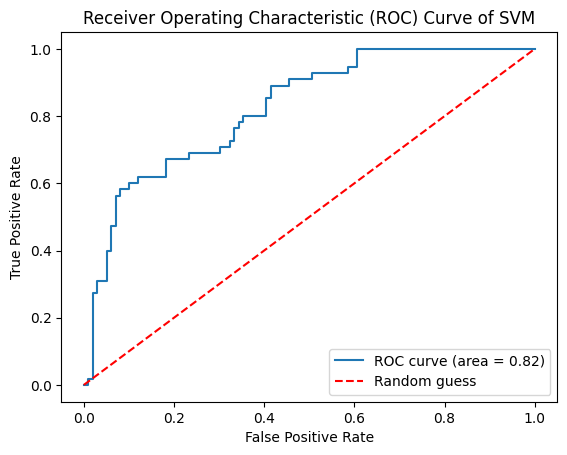

In [41]:
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_svm = auc(fpr_svm, tpr_svm)
# Plot the ROC curve
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.2f)' % roc_auc_svm)
# Plot the diagonal line representing random guess
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend(loc='lower right')
plt.show()

In [42]:
from sklearn.svm import SVC
# Store the column names of the features in a list
column_names_stored_svm = x.columns.tolist()
# Create an empty dictionary to store accuracy results
results_svm = {}

for i, column in enumerate(column_names_stored_svm):
    # Remove the current column from both training and testing data
    X_train_filtered = np.delete(X_train, i, axis=1)
    X_test_filtered = np.delete(X_test, i, axis=1)

    model = SVC()
    # Train the model with the modified training data
    model.fit(X_train_filtered, y_train)
    y_pred = model.predict(X_test_filtered)
    accuracy = accuracy_score(y_test, y_pred)*100
    # Store the calculated accuracy in the results dictionary
    results_svm[column] = accuracy
# Print accuracy results for each dropped column
for column, accuracy in results_svm.items():
    print(f"Dropped Column: {column}")
    print(f"Accuracy: {accuracy:.2f}")
    print()

Dropped Column: Pregnancies
Accuracy: 74.68

Dropped Column: Glucose
Accuracy: 68.83

Dropped Column: BloodPressure
Accuracy: 74.03

Dropped Column: SkinThickness
Accuracy: 77.27

Dropped Column: Insulin
Accuracy: 76.62

Dropped Column: BMI
Accuracy: 74.03

Dropped Column: DPF
Accuracy: 72.73

Dropped Column: Age
Accuracy: 77.27



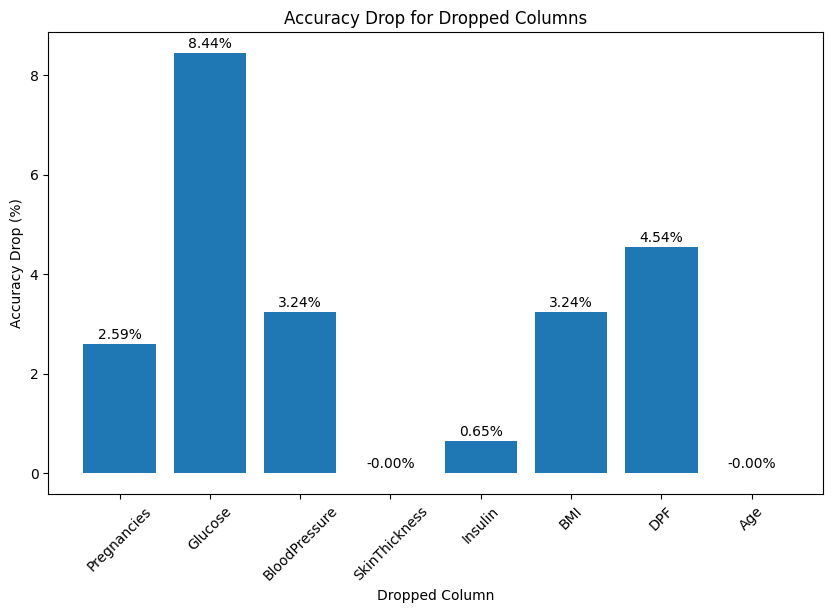

In [43]:
# Create a list to store the accuracy drop
accuracy_drops_svm = []

for column, accuracy in results_svm.items():
    accuracy_drop = (accuracy_svm - accuracy)
    # Add the calculated accuracy drop for each dropped column to the accuracy_drops_svm list
    accuracy_drops_svm.append(accuracy_drop)
# Create a bar chart to visualize accuracy drops
plt.figure(figsize=(10, 6))
plt.bar(column_names_stored_svm, accuracy_drops_svm)
plt.xlabel('Dropped Column')
plt.ylabel('Accuracy Drop (%)')
plt.title('Accuracy Drop for Dropped Columns')
plt.xticks(rotation=45)
# Add accuracy drop values above each bar
for i, v in enumerate(accuracy_drops_svm):
    plt.text(i, 0.10+v, f"{v:.2f}%", ha='center')

plt.show()

**SVM rbf Model**

Accuracy: 78.57
[[86 13]
 [20 35]]


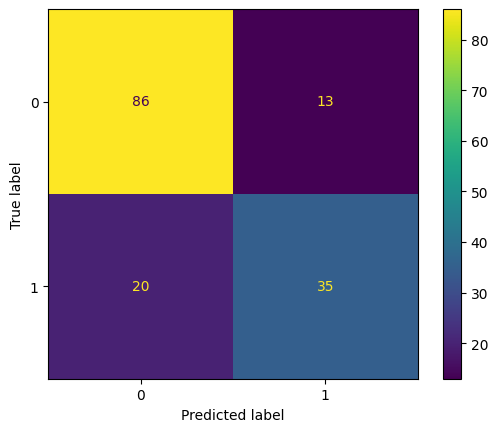

In [44]:
svm_model_pol = svm.SVC(kernel='poly',probability=True)
svm_model_pol.fit(X_train, y_train)
y_pred_svm_model_pol = svm_model_pol.predict(X_test)

accuracy_svm_pol = (accuracy_score(y_test, y_pred_svm_model_pol)*100).round(2)
print("Accuracy:", accuracy_svm_pol)
print(confusion_matrix(y_test, y_pred_svm_model_pol))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_model_pol)

#**Section 5: Conclusion**

|        Model       | Accuracy(%)  | False Negative Rate(%)|
|--------------------|--------------|-----------------------|
|KNN                 | 81.00        | 34.54                 |
|Logistic Regression | 76.62        | 40.00                 |
|Decision Tree       | 77.00        | 41.81                 |
|Random Forest       | 75.95        | 29.09                 |
|SVM                 | 78.57        | 38.18                 |

The conclusion of this study which is highlighted by an in-depth investigation of accuracy metrics, provides strong insights into the model performances. With 81% accuracy rate, the K-Nearest Neighbours (KNN) model is best among the other models implemented. This statistical result confirms that the KNN model is the best at making accurate predictions. Further investigation explores the area of false negatives rate, which has an important effect, especially in the medical field. In this only 29.09% were detected by the Random forest model, which is the fewest of all the models.

Overall, the study highlights the KNN model's superior accuracy while also recognising the Decision Tree model's superior ability to reduce false negatives. These results provide light on the possible applicability of these models in various contexts, supporting well-informed choices in situations requiring precise predictions and paying attention to negative results.

